In [10]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

In [12]:
from snake_rl.env.snake_env import SnakeEnv
from snake_rl.agents.dqn.dqn_agent import DQNAgent
from snake_rl.agents.ppo.ppo_agent import PPOAgent

In [16]:
dqn_config = {
    "gamma": 0.99,
    "learning_rate": 0.001,
    "batch_size": 64,
    "target_update_frequency": 100,
    "hidden_dim": 128,
    "replay_buffer_size": 10000
}

ppo_config = {
    "gamma": 0.99,
    "gae_lambda": 0.95,
    "learning_rate": 0.0003,
    "n_epochs": 10,
    "batch_size": 64,
    "hidden_dim": 128
}


In [18]:
env = SnakeEnv()

dqn_agent = DQNAgent(
    state_size=env.state_size,
    action_size=env.action_size,
    config=dqn_config
)
dqn_agent.load("snake_rl/models/saved_dqn.pt")

ppo_agent = PPOAgent(
    state_size=env.state_size,
    action_size=env.action_size,
    config=ppo_config
)
ppo_agent.load("snake_rl/models/saved_ppo.pt")


Model loaded from snake_rl/models/saved_dqn.pt
Model loaded from snake_rl/models/saved_ppo.pt


In [20]:
def run_episode_dqn(env, agent, max_steps=500):
    state = env.reset()
    total_reward = 0

    for _ in range(max_steps):
        action = agent.select_action(state, epsilon=0.0)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state
        if done:
            break

    return total_reward


def run_episode_ppo(env, agent, max_steps=500):
    state = env.reset()
    total_reward = 0

    for _ in range(max_steps):
        action, _, _ = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state
        if done:
            break

    return total_reward


In [21]:
NUM_EPISODES = 5

dqn_rewards = [run_episode_dqn(env, dqn_agent) for _ in range(NUM_EPISODES)]
ppo_rewards = [run_episode_ppo(env, ppo_agent) for _ in range(NUM_EPISODES)]

print("DQN Rewards:", dqn_rewards)
print("PPO Rewards:", ppo_rewards)


DQN Rewards: [135.79999999999987, -68.09999999999998, 42.20000000000003, 157.79999999999976, 166.69999999999973]
PPO Rewards: [102.89999999999986, 124.79999999999991, 104.89999999999988, 137.99999999999986, 137.5999999999998]


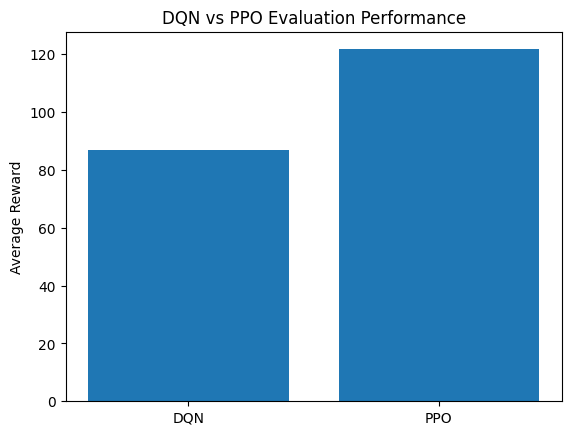

In [22]:
plt.figure()
plt.bar(["DQN", "PPO"], [np.mean(dqn_rewards), np.mean(ppo_rewards)])
plt.ylabel("Average Reward")
plt.title("DQN vs PPO Evaluation Performance")
plt.show()


In [26]:
def collect_episodes(env, dqn_agent, ppo_agent, n=10):
    dqn_results = []
    ppo_results = []

    for _ in range(n):
        dqn_reward = run_episode_dqn(env, dqn_agent)
        ppo_reward = run_episode_ppo(env, ppo_agent)

        dqn_results.append(dqn_reward)
        ppo_results.append(ppo_reward)

    return dqn_results, ppo_results


dqn_rewards, ppo_rewards = collect_episodes(env, dqn_agent, ppo_agent, n=10)


In [27]:
best_dqn = max(dqn_rewards)
worst_dqn = min(dqn_rewards)

best_ppo = max(ppo_rewards)
worst_ppo = min(ppo_rewards)

print("DQN - Works Well (High Reward Episode):", best_dqn)
print("DQN - Works Poorly (Low Reward Episode):", worst_dqn)

print("PPO - Works Well (High Reward Episode):", best_ppo)
print("PPO - Works Poorly (Low Reward Episode):", worst_ppo)


DQN - Works Well (High Reward Episode): 189.6999999999997
DQN - Works Poorly (Low Reward Episode): -93.5
PPO - Works Well (High Reward Episode): 168.69999999999973
PPO - Works Poorly (Low Reward Episode): 33.100000000000016


In [28]:
state = env.reset()

dqn_action = dqn_agent.select_action(state, epsilon=0.0)
ppo_action, _, _ = ppo_agent.select_action(state)

print("Sample State Vector:", state)
print("DQN Prediction (Action):", dqn_action)
print("PPO Prediction (Action):", ppo_action)


Sample State Vector: [-0.5 -0.4  0.   0.   0.   0.   1.   0.   0. ]
DQN Prediction (Action): 1
PPO Prediction (Action): 2
